# Factor Analysis
By Lorenz Menendez & Isaac Kamber

## Introduction
This Notebook will show how we applied Principal Component Analysis (PCA) in R to better understand voting outcomes in the 2016 U.S. Presidential Election. This Notebook begins by importing election and demographic data for outlying counties (i.e. counties who voted significantly differently than their neighbording counties). Then, we show you how to construct a correlation matrix in R, validate the effectiveness of a PCA analysis, and finanlly complete the PCA analysis. Along the way, we touch on some of the statistical reasoning behind our choice of statistical methods as they relate to our interpretation of the election data. A more detailed account on implementing PCA can he found at the [UCLA Institute for Digital Reserach & Education](https://stats.idre.ucla.edu/spss/seminars/introduction-to-factor-analysis/a-practical-introduction-to-factor-analysis/).

## Specific Goals
Running a PCA will help better understand which characteristics define outlying counties by reducing the number of variables (or "dimensions") so we can interpret overall trends. At the end of the analysis, we will have a breakdown of how each demographic variable contributed to more general components which are themselves uncorrelated.

## Libraries
To begin, you're going to need to library the following packages. We will library additional packages as we go along through the tutorial so you can see when each packages' functions are used. 

In [2]:
library(sf)
library(dplyr)

Warning message:
“package ‘sf’ was built under R version 3.4.4”Linking to GEOS 3.6.1, GDAL 2.1.3, PROJ 4.9.3
Warning message:
“package ‘dplyr’ was built under R version 3.4.4”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Importing County-Level Election Data
In a previous notebook, we learned how to identify outlying counties using LISA Maps. Now, we are going to import demogaphic, electoral, and geographic data. We've simplified the data wrangling task for you by compiling the necessary data for you. To load it simply run the following code.

In [4]:
outlierData = st_read("https://github.com/isaacnk/2016Election/raw/master/Notebooks/DATA/studyData.geojson") %>% 
        filter(LowHigh == 1 | HighLow == 1) # Filtering for Outlying Counties

Reading layer `OGRGeoJSON' from data source `https://github.com/isaacnk/2016Election/raw/master/Notebooks/DATA/studyData.geojson' using driver `GeoJSON'
Simple feature collection with 72 features and 57 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -123.3708 ymin: 26.95892 xmax: -75.76691 ymax: 48.56332
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


To verify that the data downloaded successfully, run the following code and make sure that R returns 'sf' and 'data.frame'

In [5]:
class(outlierData)

[1] "sf"         "data.frame"

## Creating a Correlation Matrix
Before attempting a PCA, we have to make sure that the measured variables (or "Factors") we chose are actually correlated with the dependent variable we are trying to explain. In this case, we want to make sure that our socioeconomic and demographic factors are actually correlated with the voting outcome. 

For a PCA to be meaningful, we would like to see that many factors are highly correlated or anticorrelated with the dependent variable. Here, we want to see that our county-level variables are correlated with the percent of the vote that went to Hillary Clinton in that county. To do that, we tell R to create a correlation matrix for our imported dataset.

In [6]:
outlierCor = select(outlierData, -area_name, -fips, -state_abbreviation, -LowHigh, -HighLow, -pct_trm) %>% # Removing Unnecessary Variables
        st_drop_geometry() %>% # Dropping the Geometry Column for speed optimization
        cor() # Create a Correlation Matrix

Now let's view the data to see how our variables are correlated

In [7]:
outlierCor[,"pct_hll"] %>% sort(decreasing = TRUE)

pct_hll   SBO115207   RHI325214   HSG096213   AGE135214   EDU685213 
 1.00000000  0.53486144  0.48992983  0.47482447  0.43217156  0.39980817 
  HSD310213   PVY020213   EDU635213   RTN131207   AFN120207   BZA110213 
 0.38116834  0.32497190  0.28835399  0.28414108  0.27936764  0.27931942 
  BZA010213   RTN130207   HSG495213   HSG010214   LND110210   NES010213 
 0.26855576  0.25992076  0.25852209  0.25014673  0.24813584  0.24735304 
  POP010210   PST040210   SBO001207   HSD410213   PST045214   VET605213 
 0.24657925  0.24653349  0.24488022  0.24459751  0.24245345  0.21727350 
  AGE295214   WTN220207   MAN450207   RHI425214   BPS030214   SBO215207 
 0.21304069  0.19675812  0.19663493  0.18907596  0.17760001  0.17745404 
  POP645213   POP815213   SBO315207   PST120214   RHI525214   RHI625214 
 0.14644222  0.13472965  0.12222265  0.09318838  0.07468285  0.06218678 
  SBO015207   INC910213   POP060210   SBO415207   SEX255214   RHI725214 
 0.05467259  0.04712177  0.04241100  0.01864136  0.01831059 -0.01999452 
  INC110213   RHI225214   BZA115213   POP715213   AGE775214   RHI825214 
-0.04376231 -0.06786411 -0.10030209 -0.16181416 -0.37908068 -0.38825926 
  LFE305213   RHI125214   HSG445213 
-0.41823991 -0.44266452 -0.52197283

We notice that the variables 'SBO115207', 'RHI325214', and 'HSG096213' are the most positively correlated variables to the percent of the vote going to Clinton. Similarly, 'HSG445213', 'RHI125214', and 'LFE305213' are the most negatively correlated.

To make this output more useable, lets read in the definitions for our data.

In [30]:
dataDictionary = read.csv("DATA/county_facts_dictionary.csv")  # Importing dictionary from CSV

dataDictionary

column_name,description
PST045214,"Population, 2014 estimate"
PST040210,"Population, 2010 (April 1) estimates base"
PST120214,"Population, percent change - April 1, 2010 to July 1, 2014"
POP010210,"Population, 2010"
AGE135214,"Persons under 5 years, percent, 2014"
AGE295214,"Persons under 18 years, percent, 2014"
AGE775214,"Persons 65 years and over, percent, 2014"
SEX255214,"Female persons, percent, 2014"
RHI125214,"White alone, percent, 2014"
RHI225214,"Black or African American alone, percent, 2014"


Therefore, we notice that Clinton's share of votes is positively corrlelated with the percent of American-Indian owned firms, the percent of American-Indian population, and the percent of housing units in multi-unit structures. 

Clinton's vote is negatively correlated with homeownership rate, percent of population identified as White-Alone, and mean travel time to work. 

As you can tell, simply studying the correlations between each variable one-by-one does not really show anything very useful about the underlying data trends in outlying counties. Therefore, it could be wise to run a PCA.

## Implementing a Principal Component Analysis

### I. Verify Sampling Accuracy
We will use to [Kaiser-Meyer-Olkin (KMO)](https://www.statisticshowto.datasciencecentral.com/kaiser-meyer-olkin/) Test to determine whether our variables were adequately sampled to actually run a PCA. The KMO will return a value between 0 (Low Accuracy) and 1 (High Accuracy). For the PCA, we are looking for KMO greater than 0.5.

Finding the KMO in R is very easy thanks to a Psychology-related package used below 

In [9]:
library(psych)
KMO(outlierCor)

Warning message:
“package ‘psych’ was built under R version 3.4.4”

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = outlierCor)
Overall MSA =  0.64
MSA for each item = 
PST045214 PST040210 PST120214 POP010210 AGE135214 AGE295214 AGE775214 SEX255214 
     0.78      0.74      0.25      0.74      0.50      0.50      0.62      0.47 
RHI125214 RHI225214 RHI325214 RHI425214 RHI525214 RHI625214 RHI725214 RHI825214 
     0.45      0.36      0.48      0.46      0.26      0.28      0.44      0.53 
POP715213 POP645213 POP815213 EDU635213 EDU685213 VET605213 LFE305213 HSG010214 
     0.51      0.37      0.63      0.59      0.69      0.86      0.60      0.78 
HSG445213 HSG096213 HSG495213 HSD410213 HSD310213 INC910213 INC110213 PVY020213 
     0.65      0.69      0.42      0.78      0.58      0.54      0.49      0.59 
BZA010213 BZA110213 BZA115213 NES010213 SBO001207 SBO315207 SBO115207 SBO215207 
     0.82      0.85      0.15      0.85      0.85      0.73      0.50      0.67 
SBO415207 SBO015207 MAN450207 WTN220207 RTN130207 RTN131207 AFN120207 BPS030214 
     0.

Notice that the overall MSA (i.e. the KMO) is 0.64 > 0.5, so we can do a PCA. Note however that 0.64 is considered a mediocre sampling accuracy.

### II. Running the PCA
We wil use a nifty exploratory data analysis package called 'FactoMineR' to run the PCA.

Before running the PCA though, we have to remove Clinton's voting percentage from our dataset because we assume that it's a dependent variable, which is influenced by all the other demographic variables. We include this basic data wrangling step as a part of the overall PCA code below

In [10]:
library(FactoMineR)

outlierPCA = outlierCor[-ncol(outlierCor),-nrow(outlierCor)] %>% # Removing Clinton's voting percentage
    PCA() # Running the PCA

Warning message:
“package ‘FactoMineR’ was built under R version 3.4.4”

### III. Interpreting the PCA Output

#### Scree Plot
Remember that the PCA analysis is a dimension reduction technique that takes our many demographic variables and condenses them down into multiple 'components'. Each component is uncorrelated with the other components. The goal is to select components that best explain the largest variance in our outlying counties' demographic data. To do this, we'll use R to graph a 'scree plot' that will show us how much variance is represented in each component.

Note: The following could could take a few seconds to run!

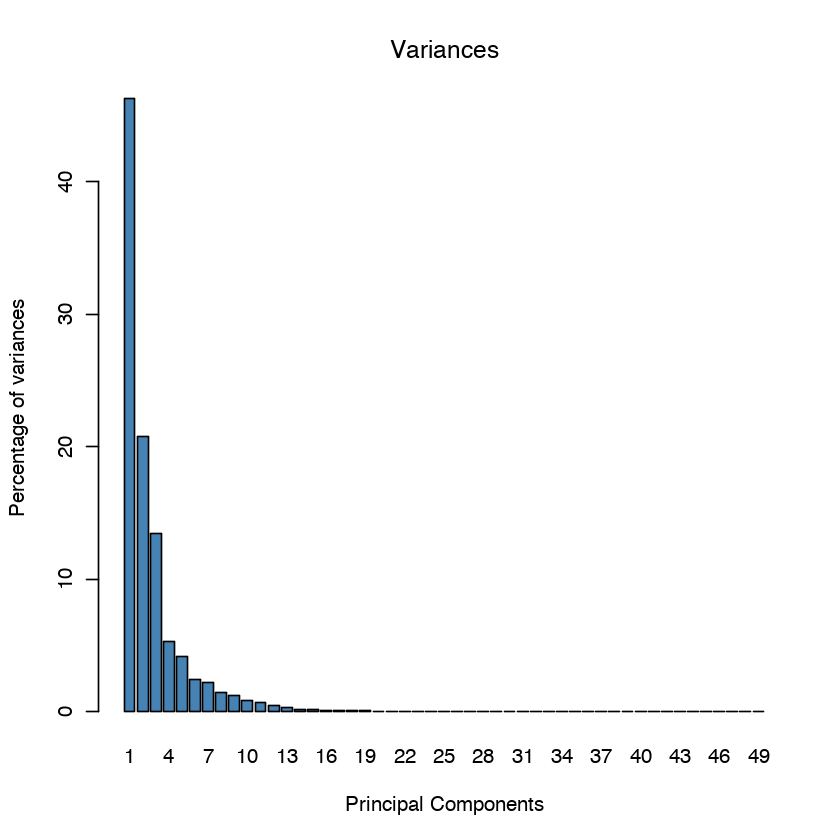

In [12]:
barplot(outlierPCA$eig[, 2], names.arg=1:nrow(outlierPCA$eig), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")

The screeplot above shows that the first component account for over 40% of the variance int the dataset, while the second components accounts for ~20% and the third for ~15%. If you were to add the variance of all 50 components, you would end up with 100% of the variance, which is nice but you're not reducing the number of variables!

In this case, we're going to select only the first three components for further analysis since they account for 75% of the variance combined. (NB: An argument could also be made to only study the first component since it account for almost double the variance of the second component.)

#### Component Analysis
The final step is to understand how are original variables factor into the three components we selected from the screeplot. The following code with show how each of the original variables are correlated with each component. The Handy Data Dictionary is also included. 

In [33]:
library(tidyverse)

outlierPCA$var$coord %>% # PCA Analysis Output
    as.data.frame(fix.empty.names = TRUE) %>%
    rownames_to_column(var = "Original Variable") %>% 
    arrange(desc(Dim.1))

Original Variable,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
AFN120207,0.95863611,0.20680321,0.0002792705,-5.693928e-02,0.100766351
SBO001207,0.95493051,0.22399235,-0.0595090909,-5.373894e-02,0.127045200
NES010213,0.95384803,0.23090657,-0.0686491719,-4.441453e-02,0.133363163
HSG010214,0.95372094,0.24502829,-0.0583408595,-7.222549e-02,0.112626870
HSD410213,0.95285738,0.24897102,-0.0678676022,-6.830863e-02,0.112342439
BZA010213,0.95280690,0.23720992,-0.0315863721,-6.151315e-02,0.116175879
VET605213,0.95246001,0.24198515,-0.0687238383,-7.496217e-02,0.118335887
RTN130207,0.95244219,0.24674276,-0.0629496367,-7.515583e-02,0.108142014
PST045214,0.95145979,0.25708879,-0.0639743645,-5.471960e-02,0.118738036
BPS030214,0.95137972,0.22284031,0.0041207239,-4.630493e-03,0.136642075


In [34]:
dataDictionary

column_name,description
PST045214,"Population, 2014 estimate"
PST040210,"Population, 2010 (April 1) estimates base"
PST120214,"Population, percent change - April 1, 2010 to July 1, 2014"
POP010210,"Population, 2010"
AGE135214,"Persons under 5 years, percent, 2014"
AGE295214,"Persons under 18 years, percent, 2014"
AGE775214,"Persons 65 years and over, percent, 2014"
SEX255214,"Female persons, percent, 2014"
RHI125214,"White alone, percent, 2014"
RHI225214,"Black or African American alone, percent, 2014"


Our output shows that around thirteen variables are highly correlated (>0.90) with the first component. Some notable variables are:
* SBO001207	Total number of firms
* NES010213	Nonemployer establishments
* HSD410213	Households
* VET605213	Veterans
* RTN130207	Retail sales
* BPS030214	Building permits